1(a)

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#reading training dataset and splitting it into X and y
house_data = pd.read_csv('house/train.csv')
test_data = pd.read_csv('house/test.csv')

1(b)

In [4]:
#getting the shape of the training dataset
print(house_data.shape)

(1460, 81)


In [5]:
#getting the data types of each column
print(house_data.dtypes.value_counts())

object     43
int64      35
float64     3
dtype: int64


In [6]:
#getting the names of numerical and categorical features
data_types_dict = {'Numerical': [], 'Categorical': []}
features_list = []        ##list of all features - for later use

for i in range(0, 81):
    col_name = house_data.iloc[:,i].name
    col_type = house_data.iloc[:,i].dtype
    features_list.append(col_name)
    if col_type == 'float64' or col_type == 'int64':
        data_types_dict['Numerical'].append(col_name)
    else:
        data_types_dict['Categorical'].append(col_name)

print('There are', len(data_types_dict['Numerical']), 'Numerical features:', data_types_dict['Numerical'])
print()
print('There are', len(data_types_dict['Categorical']), 'Categorical features:', data_types_dict['Categorical'])

There are 38 Numerical features: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

There are 43 Categorical features: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQu

1(c)

In [7]:
#preprocessing - filling empty cells and NaN
mean_fill_list = []
bfill_list = []

mean_fill_list_test = []
bfill_list_test = []

for feature in features_list:
    nan_rows_count = house_data[feature].isna().sum()
    if (nan_rows_count != 0):
        if (feature in data_types_dict['Numerical']):
            mean_fill_list.append(feature)
        else:
            bfill_list.append(feature)
        print(feature, nan_rows_count)

print()
for feature in features_list:
    nan_rows_count = test_data[feature].isna().sum()
    if (nan_rows_count != 0):
        if (feature in data_types_dict['Numerical']):
            mean_fill_list_test.append(feature)
        else:
            bfill_list_test.append(feature)
        print(feature, nan_rows_count)

LotFrontage 259
Alley 1369
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406

MSZoning 4
LotFrontage 227
Alley 1352
Utilities 2
Exterior1st 1
Exterior2nd 1
MasVnrType 16
MasVnrArea 15
BsmtQual 44
BsmtCond 45
BsmtExposure 44
BsmtFinType1 42
BsmtFinSF1 1
BsmtFinType2 42
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
KitchenQual 1
Functional 2
FireplaceQu 730
GarageType 76
GarageYrBlt 78
GarageFinish 78
GarageCars 1
GarageArea 1
GarageQual 78
GarageCond 78
PoolQC 1456
Fence 1169
MiscFeature 1408
SaleType 1


KeyError: 'SalePrice'

In [8]:
#filling numerical features with mean value of the column
for feature in mean_fill_list:
    house_data[feature].fillna(house_data[feature].mean(), inplace = True)

for feature in mean_fill_list_test:
    test_data[feature].fillna(test_data[feature].mean(), inplace = True)
#filling categorical features with backfill
for feature in bfill_list:
    house_data[feature].fillna(method='bfill', inplace = True)
    house_data[feature].fillna(method='ffill', inplace = True)
    
for feature in bfill_list_test:
    test_data[feature].fillna(method='bfill', inplace = True)
    test_data[feature].fillna(method='ffill', inplace = True)

In [9]:
#selecting 7 features
house_data_temp = house_data[['YrSold','GarageArea','LotArea','GrLivArea','OverallQual','OverallCond','TotRmsAbvGrd','SalePrice']]

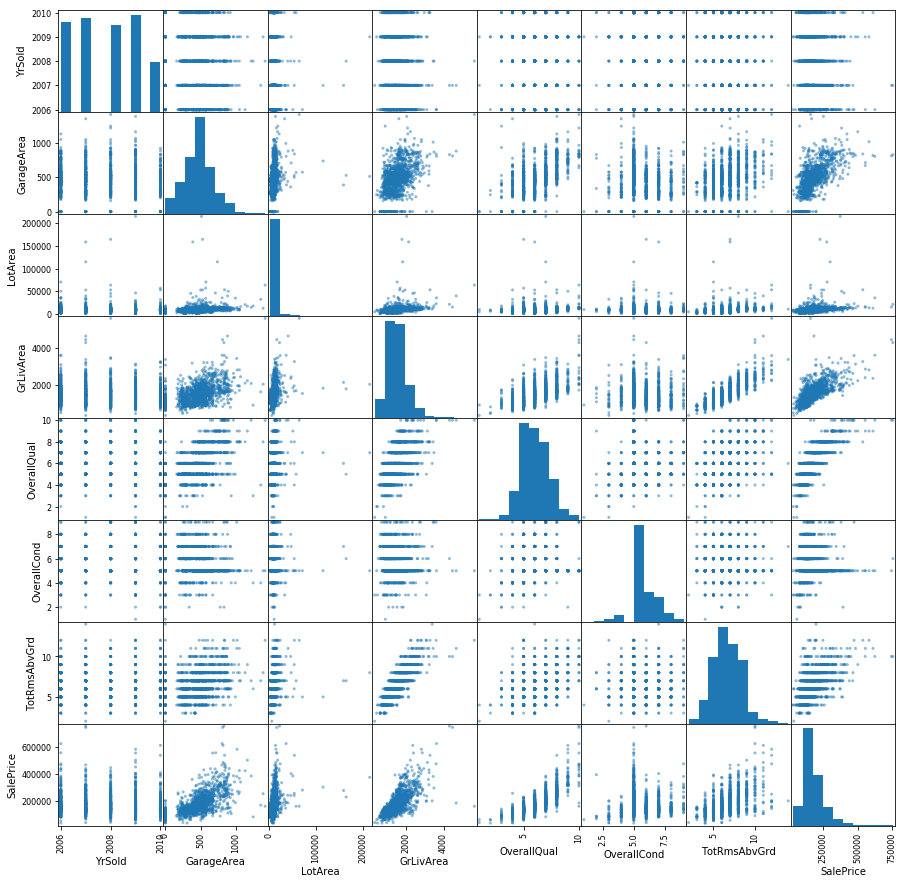

In [10]:
#plotting the scatterplot matrix
from pandas.plotting import scatter_matrix

scatter_matrix(house_data_temp, figsize=(15, 15))
plt.show()

1(d)

In [11]:
X_train_all = house_data.iloc[:,:-1]
y_train_all = house_data.iloc[:,-1:]

In [12]:
#preprocessing - label encoding & scaling
from sklearn.preprocessing import StandardScaler, LabelEncoder

cat_data = data_types_dict['Categorical']
num_data = data_types_dict['Numerical']
num_data.remove('SalePrice')

#using LabelEncoder to encode categorical data
for i in range(0, 80):
    column = X_train_all.iloc[:,i].name
    if column in cat_data:
        encoder = LabelEncoder()
        X_train_all[column] = encoder.fit_transform(X_train_all[column])

#using StandardScaler to scale numerical data
scaler = StandardScaler()
X_train_all[num_data] = scaler.fit_transform(X_train_all[num_data])

/Users/michael/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/michael/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [13]:
#performing OLS on all features
import statsmodels.api as sm

features_list.remove('SalePrice')

features_with_zero_coef = []
for feature in features_list:
    y = y_train_all['SalePrice']
    X = X_train_all[feature]
    X = sm.add_constant(X)

    model = sm.OLS(y, X)
    model = model.fit()
    #optionally, print the summary results to the screen
    #warning: it will be very long as there are 80 features in total
    #print(model.summary())
    
    #checking which feature has a 95% confidence interval that contains 0
    lower_bound = model.conf_int().iloc[1,0]
    upper_bound = model.conf_int().iloc[1,1]
    if (0 >= lower_bound and 0 <= upper_bound):
        features_with_zero_coef.append(feature)

/Users/michael/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [14]:
print('Below are the features whose coefficient has a 95% confidence interval that contains 0:', features_with_zero_coef)

Below are the features whose coefficient has a 95% confidence interval that contains 0: ['Id', 'Street', 'Alley', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'MasVnrType', 'BsmtFinType2', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', '3SsnPorch', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold']


1(e)

In [15]:
#performing one hot encoding
transformed_house_data = house_data.iloc[:,:-1]
transformed_house_data = pd.get_dummies(transformed_house_data)

transformed_test_data = pd.get_dummies(test_data)

In [16]:
#performing data scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

num_data = data_types_dict['Numerical']
scaler = StandardScaler()
transformed_house_data[num_data] = scaler.fit_transform(transformed_house_data[num_data])
transformed_test_data[num_data] = scaler.fit_transform(transformed_test_data[num_data])

/Users/michael/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/michael/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/michael/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/michael/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [17]:
#splitting the data into training and validation sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_house_data, y_train_all, test_size = 0.2, random_state = 123)

#preprocessing - one hot encoding & scaling
#DEPRECATED in favor of pd.get_dummies

from sklearn.preprocessing import StandardScaler, OneHotEncoder

cat_data = data_types_dict['Categorical']
num_data = data_types_dict['Numerical']

encoder = OneHotEncoder()
transformed_cat_data = encoder.fit_transform(X_train_all[cat_data])

scaler = StandardScaler()
transformed_num_data = scaler.fit_transform(X_train_all[num_data])

transformed_data = np.concatenate([transformed_cat_data.toarray(), transformed_num_data], axis=1)

In [18]:
#helper function to get accuracy score
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.preprocessing import scale

def get_rmsle(true, pred):
    print('RMSLE:', np.sqrt(mean_squared_log_error(y_test, predictions)))

def get_mse(true, pred):
    y_pred_scaled = scale(predictions)
    y_true_scaled = scale(y_test)

    print('raw MSE:', mean_squared_error(y_test, predictions))
    print('MSE after scaling the targets:', mean_squared_error(y_true_scaled, y_pred_scaled))

1(e)(1)

In [23]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression(fit_intercept=False).fit(X_train, y_train)
predictions = linreg.predict(X_test)

In [24]:
get_mse(y_test, predictions)

raw MSE: 5.576192761838882e+28
MSE after scaling the targets: 1.5848997374107638


1(e)(2)

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

def knn_cv(X_train, y_train):
    #setting a range of neighbors to choose from
    neighbors_list = [i for i in range(1, 26)]
    cv_mse_scores = []

    #using cross validation to choose k
    for k in neighbors_list:
        model = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
        cv_mse_scores.append((k, scores.mean()))
    
    return cv_mse_scores

In [66]:
cv_mse_scores = knn_cv(X_train, y_train)
cv_mse_scores = sorted(cv_mse_scores, key=lambda x:x[1], reverse=True)

In [67]:
cv_mse_scores

[(2, -1200445613.0479522),
 (1, -1266076493.0646257),
 (3, -1515744190.0490956),
 (4, -1621348467.7007246),
 (5, -1836392740.6409512),
 (25, -1915602105.451697),
 (24, -1928008651.328767),
 (6, -1964740025.0529888),
 (7, -2032580454.4420967),
 (21, -2046639403.550825),
 (23, -2048052008.704659),
 (8, -2073239536.5964737),
 (20, -2083027604.356844),
 (22, -2090365225.0181613),
 (19, -2110507631.953502),
 (9, -2163228416.487009),
 (18, -2163379477.716575),
 (17, -2174648485.6626377),
 (16, -2215303726.0126467),
 (10, -2224018449.9102345),
 (15, -2237038359.9151883),
 (12, -2255283302.654233),
 (11, -2279281701.374959),
 (13, -2294905393.0761023),
 (14, -2314560165.4904284)]

1(e)(3)

In [30]:
from sklearn.linear_model import RidgeCV, Ridge

#list of lambdas to choose from
lambdas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e2, 1e3, 1e4, 1e5]

cv_model = RidgeCV(alphas=lambdas, cv=10).fit(X_train, y_train)

/Users/michael/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [31]:
cv_model.alpha_

100.0

In [32]:
model = Ridge(alpha=100)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [33]:
get_mse(y_test, predictions)

raw MSE: 727737943.2572291
MSE after scaling the targets: 0.11551397967581559


/Users/michael/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  if __name__ == '__main__':


1(e)(4)

In [152]:
from sklearn.linear_model import LassoCV, Lasso

cv_model = LassoCV(cv=10).fit(X_train, y_train)

In [153]:
lasso_alpha = cv_model.alpha_
lasso_alpha

169.15539825759947

In [154]:
all_features = list(X_train.columns)
coefs = cv_model.coef_
lasso_selected_features = []

for idx, feature in enumerate(all_features):
    if coefs[idx] != 0:
        lasso_selected_features.append(feature)

print('Lasso selected', len(lasso_selected_features), 'features: ', lasso_selected_features)

Lasso selected 96 features:  ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'MSZoning_RL', 'LotShape_IR2', 'LandContour_Bnk', 'LandContour_HLS', 'LotConfig_CulDSac', 'LandSlope_Mod', 'Neighborhood_BrkSide', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Condition1_Norm', 'Condition2_PosN', 'BldgType_1Fam', 'BldgType_2fmCon', 'HouseStyle_2Story', 'RoofMatl_ClyTile', 'RoofMatl_WdShngl', 'Exterior1st_BrkFa

In [155]:
model = Lasso(alpha=lasso_alpha)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [159]:
get_mse(y_test, predictions)
get_rmsle(y_test, predictions)

raw MSE: 638152214.919545
MSE after scaling the targets: 0.10387687062940795
RMSLE: 0.11716347755983124


1(e)(5) + (6)

In [19]:
##from https://pypi.org/project/stepwise-regression/ 
##(https://github.com/AakkashVijayakumar/stepwise-regression/blob/master/stepwise_regression/step_reg.py)

import pandas as pd
import statsmodels.api as sm


def forward_regression(X, y,
                       threshold_in,
                       verbose=False):
    initial_list = []
    included = list(initial_list)
    while True:
        changed=False
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        if not changed:
            break

    return included

def backward_regression(X, y,
                           threshold_out,
                           verbose=False):
    included=list(X.columns)
    while True:
        changed=False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [20]:
from sklearn.model_selection import KFold
import warnings

warnings.filterwarnings('ignore')        ##suppress warnings

def stepwise(X_train, y_train):
    features_dict = {}
    droppe_features_dict = {}
    kf = KFold(n_splits=10)        ##using sklearn's KFold to do cross validation
    counter = 1
 
    for train_idx, test_idx in kf.split(X_train):        ##looping through each fold
        X_train_current = X_train.iloc[train_idx,:]
        y_train_current = y_train.iloc[train_idx,:]

        print('Now processing forward stepwise fold', counter)        ##allow 2-3 minutes for each fold
        temp_features = forward_regression(X_train_current, y_train_current, 0.05, False)

        print('Now processing backward stepwise fold', counter)
        temp_dropped_features = backward_regression(X_train_current, y_train_current, 0.05, False)
        counter += 1
        
        ##adding preserved/dropped features to dictionary
        for feature in temp_features:
            if feature in features_dict:
                features_dict[feature] += 1
            else:
                features_dict[feature] = 1

        for feature in temp_dropped_features:
            if feature in droppe_features_dict:
                droppe_features_dict[feature] += 1
            else:
                droppe_features_dict[feature] = 1
                
    selected_features = []
    for item in features_dict.items():
        if item[1] >= 7:        ##when a feature appears at least 7 times out of 10, we use it
            selected_features.append(item[0])

    dropped_features = []
    for item in droppe_features_dict.items():
        if item[1] >= 7:        ##when a feature was dropped at least 7 times out of 10, we drop it
            dropped_features.append(item[0])
    
    #getting the selected features for backward stepwise
    new_features_list = list(X_train.columns)
    selected_features_backward = []
    for f in new_features_list:
        if f in dropped_features:
            pass
        else:
            selected_features_backward.append(f)
    return selected_features, selected_features_backward, dropped_features

In [21]:
selected_features, selected_features_backward, dropped_features = stepwise(X_train, y_train)
print('Forward stepwise feature selection yielded', len(selected_features), 'features:',selected_features)
print('Backward stepwise feature selection dropped', len(dropped_features), 'features:',dropped_features)
print('Backward stepwise feature selection yielded', len(selected_features_backward), 'features:',selected_features_backward)

Now processing forward stepwise fold 1
Now processing backward stepwise fold 1
Now processing forward stepwise fold 2
Now processing backward stepwise fold 2
Now processing forward stepwise fold 3
Now processing backward stepwise fold 3
Now processing forward stepwise fold 4
Now processing backward stepwise fold 4
Now processing forward stepwise fold 5
Now processing backward stepwise fold 5
Now processing forward stepwise fold 6
Now processing backward stepwise fold 6
Now processing forward stepwise fold 7
Now processing backward stepwise fold 7
Now processing forward stepwise fold 8
Now processing backward stepwise fold 8
Now processing forward stepwise fold 9
Now processing backward stepwise fold 9
Now processing forward stepwise fold 10
Now processing backward stepwise fold 10
Forward stepwise feature selection yielded 36 features: ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'TotalBsmtSF', 'Condition2_PosN', 'YearBuilt', 'ExterQual_Ex', 'BldgType_1

In [25]:
X_train_new = X_train[selected_features]
X_test_new = X_test[selected_features]

linreg = LinearRegression(fit_intercept=False).fit(X_train_new, y_train)
predictions = linreg.predict(X_test_new)

In [26]:
print('forward stepwise results:')
get_mse(y_test, predictions)

forward stepwise results:
raw MSE: 1009750171.1729928
MSE after scaling the targets: 0.1662304318459621


In [27]:
X_train_new = X_train[selected_features_backward]
X_test_new = X_test[selected_features_backward]

linreg = LinearRegression(fit_intercept=False).fit(X_train_new, y_train)
predictions = linreg.predict(X_test_new)

In [28]:
print('backward stepwise results:')
get_mse(y_test, predictions)

backward stepwise results:
raw MSE: 1.0818325889140784e+30
MSE after scaling the targets: 2.428755111487513


1(f)

In [29]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2)
house_data_with_pf = pf.fit_transform(transformed_house_data)
house_data_with_pf = np.delete(house_data_with_pf, 1, 1)        ##getting rid of the first column of '1' added by 
                                                                ##sklearn, which is not required per instructions
house_data_with_pf = pd.DataFrame(house_data_with_pf)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(house_data_with_pf, y_train_all, test_size = 0.2, random_state = 234)

1(f)(1)

In [35]:
linreg = LinearRegression(fit_intercept=False).fit(X_train, y_train)
predictions = linreg.predict(X_test)

In [36]:
get_mse(y_test, predictions)

raw MSE: 829637497.0013595
MSE after scaling the targets: 0.15445306800247416


1(f)(2)

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

cv_mse_scores = knn_cv(X_train, y_train)        ##takes around 30 minutes
cv_mse_scores = sorted(cv_mse_scores, key=lambda x:x[1], reverse=True)
cv_mse_scores

[(2, -1200445613.0479522),
 (1, -1266076493.0646257),
 (3, -1515744190.0490956),
 (4, -1621348467.7007246),
 (5, -1836392740.6409512),
 (25, -1915602105.451697),
 (24, -1928008651.328767),
 (6, -1964740025.0529888),
 (7, -2032580454.4420967),
 (21, -2046639403.550825),
 (23, -2048052008.704659),
 (8, -2073239536.5964737),
 (20, -2083027604.356844),
 (22, -2090365225.0181613),
 (19, -2110507631.953502),
 (9, -2163228416.487009),
 (18, -2163379477.716575),
 (17, -2174648485.6626377),
 (16, -2215303726.0126467),
 (10, -2224018449.9102345),
 (15, -2237038359.9151883),
 (12, -2255283302.654233),
 (11, -2279281701.374959),
 (13, -2294905393.0761023),
 (14, -2314560165.4904284)]

1(f)(3)

In [27]:
from sklearn.linear_model import RidgeCV, Ridge    

lambdas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e2, 1e3, 1e4, 1e5]
cv_model = RidgeCV(alphas=lambdas, cv=10).fit(X_train, y_train)

/Users/michael/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [28]:
cv_model.alpha_

1000.0

In [29]:
model = Ridge(alpha=100)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [30]:
get_mse(y_test, predictions)

raw MSE: 771480924.837647
MSE after scaling the targets: 0.1472970240166456


/Users/michael/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  if __name__ == '__main__':


1(f)(4)
# NOTE: the below model will run for a very long period of time 

In [ ]:
from sklearn.linear_model import LassoCV, Lasso

cv_model = LassoCV(cv=10).fit(X_train, y_train)

In [ ]:
lasso_alpha = cv_model.alpha_
lasso_alpha

In [ ]:
model = Lasso(alpha=lasso_alpha)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [ ]:
get_mse(y_test, predictions)

1(f)(5) + (6)
# NOTE: the below model will run for a very long period of time 

In [ ]:
selected_features, selected_features_backward, dropped_features = stepwise(X_train, y_train)
print('Forward stepwise feature selection yielded', len(selected_features), 'features:',selected_features)
print('Backward stepwise feature selection dropped', len(dropped_features), 'features:',dropped_features)
print('Backward stepwise feature selection yielded', len(selected_features_backward), 'features:',selected_features_backward)

In [ ]:
X_train_new = X_train[selected_features]
X_test_new = X_test[selected_features]

linreg = LinearRegression(fit_intercept=False).fit(X_train_new, y_train)
predictions = linreg.predict(X_test_new)

In [ ]:
print('forward stepwise results:')
get_mse(y_test, predictions)

In [ ]:
X_train_new = X_train[selected_features_backward]
X_test_new = X_test[selected_features_backward]

linreg = LinearRegression(fit_intercept=False).fit(X_train_new, y_train)
predictions = linreg.predict(X_test_new)

In [ ]:
print('backward stepwise results:')
get_mse(y_test, predictions)

1(g)

In [ ]:
## see 1(e)(4) for lasso, 1(e)(5) + (6) for stepwise

1(h)

In [143]:
transformed_house_data, transformed_test_data = transformed_house_data.align(transformed_test_data, join='outer', axis=1, fill_value=0)

In [146]:
#using lasso

cv_model = LassoCV(cv=10).fit(transformed_house_data, y_train_all)
#print(cv_model.alpha_)
model = Lasso(alpha=cv_model.alpha_)
model.fit(transformed_house_data, y_train_all)
predictions = model.predict(transformed_test_data)

166.84490230495518


In [150]:
#generate csv output for submission to Kaggle
output = open('submission1.csv', 'w')
output.write('Id,SalePrice\n')
start = 1461

for i in range(0, len(predictions)):
    string = str(start) + ',' + str(predictions[i])
    output.write(string)
    output.write('\n')
    start += 1
    
output.close()

2(a)

In [43]:
#reading input files and storing data
file_names = ['amazon_cells_labelled', 'imdb_labelled', 'yelp_labelled']
amazon = []
imdb = []
yelp = []

for file in file_names:
    path = 'sentences/' + file + '.txt'
    sentences_file = open(path)
    for line in sentences_file:
        line = line.rstrip('\n')
        temp = line.split('\t')
        if file == 'amazon_cells_labelled':
            amazon.append(temp)
        elif file == 'imdb_labelled':
            imdb.append(temp)
        else:
            yelp.append(temp)

In [44]:
#checking the number of positive & negative reviews in each dataset
amazon_dict = {}
imdb_dict = {}
yelp_dict = {}

for index, review in enumerate(amazon):
    score = review[1]
    if score in amazon_dict:
        amazon_dict[score].append(index)
    else:
        amazon_dict[score] = [index]
        
for index, review in enumerate(imdb):
    score = review[1]
    if score in imdb_dict:
        imdb_dict[score].append(index)
    else:
        imdb_dict[score] = [index]
        
for index, review in enumerate(yelp):
    score = review[1]
    if score in yelp_dict:
        yelp_dict[score].append(index)
    else:
        yelp_dict[score] = [index]

In [45]:
print('0 in amazon:', len(amazon_dict['0']), '; 1 in amazon:', len(amazon_dict['1']))
print('0 in yelp:', len(yelp_dict['0']), '; 1 in yelp:', len(yelp_dict['1']))
print('0 in imdb:', len(imdb_dict['0']), '; 1 in imdb:', len(imdb_dict['1']))

0 in amazon: 500 ; 1 in amazon: 500
0 in yelp: 500 ; 1 in yelp: 500
0 in imdb: 500 ; 1 in imdb: 500


2(b)

In [46]:
from nltk.stem import SnowballStemmer as sbs
stemmer = sbs('english')

In [47]:
#preprocessing
import string
from stop_list import closed_class_stop_words as stop_words

processed_amazon = []
processed_imdb = []
processed_yelp = []

for review in amazon:
    text = review[0].translate(str.maketrans(string.punctuation, ' '*len(string.punctuation)))  ##removing punctuations
    text_list = text.split()
    processed_text_list = []
    for word in text_list:
        word = stemmer.stem(word)        ##stemming & convert to lower case
        if word in stop_words:           ##removing stop words 
            pass
        else:
            processed_text_list.append(word)
    
    processed_text = ' '.join(processed_text_list)      ##converting the list into a string
    processed_amazon.append([processed_text, review[1]])
    
for review in imdb:
    text = review[0].translate(str.maketrans(string.punctuation, ' '*len(string.punctuation)))
    text_list = text.split()
    processed_text_list = []
    for word in text_list:
        word = stemmer.stem(word)
        if word in stop_words:
            pass
        else:
            processed_text_list.append(word)
    
    processed_text = ' '.join(processed_text_list)
    processed_imdb.append([processed_text, review[1]])

for review in yelp:
    text = review[0].translate(str.maketrans(string.punctuation, ' '*len(string.punctuation)))
    text_list = text.split()
    processed_text_list = []
    for word in text_list:
        word = stemmer.stem(word)
        if word in stop_words:
            pass
        else:
            processed_text_list.append(word)
    
    processed_text = ' '.join(processed_text_list)
    processed_yelp.append([processed_text, review[1]])

2(c)

In [48]:
#helper function to get the training set and test set for each sentiment of each dataset
def get_train_test(processed, index_dict):
    processed_arr = np.asarray(processed)

    positive_idx = index_dict['1']
    negative_idx = index_dict['0']

    positive = processed_arr[positive_idx]
    negative = processed_arr[negative_idx]

    positive_train = positive[:400]
    positive_test = positive[400:]
    negative_train = negative[:400]
    negative_test = negative[400:]
    
    return positive_train, positive_test, negative_train, negative_test

In [49]:
amazon_p_train, amazon_p_test, amazon_n_train, amazon_n_test = get_train_test(processed_amazon, amazon_dict)
imdb_p_train, imdb_p_test, imdb_n_train, imdb_n_test = get_train_test(processed_imdb, imdb_dict)
yelp_p_train, yelp_p_test, yelp_n_train, yelp_n_test = get_train_test(processed_yelp, yelp_dict)

combined_train = np.concatenate([amazon_p_train, amazon_n_train, imdb_p_train, imdb_n_train, yelp_p_train, yelp_n_train])
combined_test = np.concatenate([amazon_p_test, amazon_n_test, imdb_p_test, imdb_n_test, yelp_p_test, yelp_n_test])

2(d)

In [50]:
#getting all unique words in the training set

words_dict = set(())
for item in combined_train:
    text = item[0]
    text_arr = text.split()
    for word in text_arr:
        if word not in words_dict:
            words_dict.add(word)

words_dict = list(words_dict)

In [51]:
len(words_dict)

3542

In [52]:
#converting text into vectors
train_vectors = []
test_vectors = []

for item in combined_train:
    text = item[0]
    score = item[1]
    text_arr = text.split()
    vectors = [0] * 3542
    
    for word in text_arr:
        for idx, w in enumerate(words_dict):
            if w == word:
                vectors[idx] += 1
    
    train_vectors.append([vectors, score])        
    
for item in combined_test:
    text = item[0]
    score = item[1]
    text_arr = text.split()
    vectors = [0] * 3542
    
    for word in text_arr:
        for idx, w in enumerate(words_dict):
            if w == word:
                vectors[idx] += 1
    
    test_vectors.append([vectors, score])        

In [53]:
#2 examples reviews
print('review 1')
print()
print('text:', combined_train[2288][0])
print('vectors:', train_vectors[2288][0])
print('sentiment:', train_vectors[2288][1])
print('-----')
print('review 2')
print()
print('text:', combined_train[123][0])
print('vectors:', train_vectors[123][0])
print('sentiment:', train_vectors[123][1])

review 1

text: veri bad experi
vectors: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

2(e)

In [54]:
#performing log normalization on vectors
for item in train_vectors:
    vector = item[0]
    temp_vector = [x+1 for x in vector]
    transformed_vector = np.log(temp_vector)
    item[0] = transformed_vector

for item in test_vectors:
    vector = item[0]
    temp_vector = [x+1 for x in vector]
    transformed_vector = np.log(temp_vector)
    item[0] = transformed_vector

2(f)

In [15]:
#function for building a naive bayes model
def bayes_model(X, y):
    positive_word_dict = {}
    negative_word_dict = {}
    
    for word in words_dict:
        for review, label in zip(X, y):
            review_arr = review.split()
            if word in review_arr:
                if label == '1':
                    if word in positive_word_dict:
                        positive_word_dict[word] += 1
                    else:
                        positive_word_dict[word] = 1
                else:
                    if word in negative_word_dict:
                        negative_word_dict[word] += 1
                    else:
                        negative_word_dict[word] = 1
    return positive_word_dict, negative_word_dict

In [16]:
bayes_X = combined_train[:,0]
bayes_y = combined_train[:,1]

positive_word_dict, negative_word_dict = bayes_model(bayes_X, bayes_y)

In [294]:
#function for predicting sentiment based on the naive bayes model
def predict(p_dict, n_dict, X_test):
    predictions = []
    for review in X_test:
        pos_score = 1
        neg_score = 1
        review_arr = review.split()
        for word in review_arr:
            if word in positive_word_dict:
                pos_score *= ((positive_word_dict[word] + 1) / (1200 + 3542 + 1))    ##laplace smoothing
            else:
                pos_score *= (1 / (1200 + 3542 + 1))
                
            if word in negative_word_dict:
                neg_score *= ((negative_word_dict[word] + 1) / (1200 + 3542 + 1))
            else:
                neg_score *= (1 / (1200 + 3542 + 1))
        
        if pos_score > neg_score:
            predictions.append('1')
        else:
            predictions.append('0')
    
    return predictions

In [295]:
bayes_X_test = combined_test[:,0]
bayes_y_test = combined_test[:,1]

y_pred = predict(positive_word_dict, negative_word_dict, bayes_X_test)

In [296]:
from sklearn.metrics import accuracy_score

accuracy_score(bayes_y_test, y_pred)

0.8183333333333334

In [ ]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(bayes_y_test, y_pred)
pd.DataFrame(matrix, ('true %i'%x for x in range(2)),('predicted %i'%x for x in range(2)))

2(g)

In [56]:
np_train_vectors = np.asarray(train_vectors)
logreg_X = np_train_vectors[:,0]
logreg_y = np_train_vectors[:,1]

np_test_vectors = np.asarray(test_vectors)
logreg_X_test = np_test_vectors[:,0]
logreg_y_test = np_test_vectors[:,1]

In [57]:
from sklearn.linear_model import LogisticRegressionCV

logreg = LogisticRegressionCV(cv=10, penalty='l1', solver='liblinear')
logreg = logreg.fit(list(logreg_X), list(logreg_y))

In [58]:
from sklearn.metrics import accuracy_score

predictions = logreg.predict(list(logreg_X_test))
accuracy_score(logreg_y_test, predictions)

0.8383333333333334

In [59]:
logreg = LogisticRegressionCV(cv=10, penalty='l2')
logreg = logreg.fit(list(logreg_X), logreg_y)

In [60]:
predictions = logreg.predict(list(logreg_X_test))
accuracy_score(logreg_y_test, predictions)

0.8416666666666667

2(i)(1)

In [61]:
#getting the coefficients for logreg
coef_l2 = []
for idx, coef in enumerate(logreg.coef_[0]):
    temp = (coef, idx)
    coef_l2.append(temp)
    
coef_l2 = sorted(coef_l2, key=lambda x:x[0], reverse=True)

In [62]:
#getting the most important words based on the coefficients
top_coefs = coef_l2[:20]
top_words = []
for item in top_coefs:
    idx = item[1]
    top_words.append(words_dict[idx])

print(top_words)

['great', 'love', 'delici', 'excel', 'amaz', 'awesom', 'nice', 'beauti', 'good', 'fantast', 'happier', 'perfect', 'comfort', 'best', 'brilliant', 'easi', 'cool', 'happi', 'funni', 'fun']


In [63]:
#do the same for important words related to negative sentiments
coef_l2_neg = sorted(coef_l2, key=lambda x:x[0])

In [64]:
top_coefs_neg = coef_l2_neg[:20]
top_words_neg = []
for item in top_coefs_neg:
    idx = item[1]
    top_words_neg.append(words_dict[idx])

print(top_words_neg)

['poor', 'bad', 'not', 'worst', 'suck', 'terribl', 'slow', 'aw', 'fail', 'rude', 'bland', 'avoid', 'hate', 'stupid', 'disappoint', 'horribl', 'start', 'wast', 'piec', 'averag']


2(h)(d)

In [259]:
#getting all unique 2-grams in the training set
n_gram_dict = set(())
for item in combined_train:
    text = item[0]
    text_arr = text.split()
    for i in range(0, len(text_arr)-1):
        two_gram = text_arr[i] + ' ' + text_arr[i+1]
        if two_gram not in n_gram_dict:
            n_gram_dict.add(two_gram)

n_gram_dict = list(n_gram_dict)

In [262]:
len(n_gram_dict)

13734

In [267]:
#performing text (2-gram in this case) vectorization
train_vectors_ngram = []
test_vectors_ngram = []

for item in combined_train:
    text = item[0]
    score = item[1]
    text_arr = text.split()
    vectors = [0] * 13734
    
    for i in range(0, len(text_arr)-1):
        word = text_arr[i] + ' ' + text_arr[i+1]
        for idx, w in enumerate(n_gram_dict):
            if w == word:
                vectors[idx] += 1
    
    train_vectors_ngram.append([vectors, score])        
    
for item in combined_test:
    text = item[0]
    score = item[1]
    text_arr = text.split()
    vectors = [0] * 13734
    
    for i in range(0, len(text_arr)-1):
        word = text_arr[i] + ' ' + text_arr[i+1]
        for idx, w in enumerate(n_gram_dict):
            if w == word:
                vectors[idx] += 1
    
    test_vectors_ngram.append([vectors, score])        

In [269]:
print('review 1')
print()
print('text:', combined_train[2288][0])
print('vectors:', train_vectors_ngram[2288][0])
print('sentiment:', train_vectors_ngram[2288][1])
print('-----')
print('review 2')
print()
print('text:', combined_train[123][0])
print('vectors:', train_vectors_ngram[123][0])
print('sentiment:', train_vectors_ngram[123][1])

review 1

text: veri bad experi
vectors: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

2(h)(e)

In [271]:
for item in train_vectors_ngram:
    vector = item[0]
    temp_vector = [x+1 for x in vector]
    transformed_vector = np.log(temp_vector)
    item[0] = transformed_vector

for item in test_vectors_ngram:
    vector = item[0]
    temp_vector = [x+1 for x in vector]
    transformed_vector = np.log(temp_vector)
    item[0] = transformed_vector

2(h)(f)

In [274]:
def bayes_model_ngram(X, y):
    positive_word_dict = {}
    negative_word_dict = {}
    
    for word in n_gram_dict:
        for review, label in zip(X, y):
            review_arr = review.split()
            for i in range(0, len(review_arr)-1):
                current_word = review_arr[i] + ' ' + review_arr[i+1]
                if word == current_word:
                    if label == '1':
                        if word in positive_word_dict:
                            positive_word_dict[word] += 1
                        else:
                            positive_word_dict[word] = 1
                    else:
                        if word in negative_word_dict:
                            negative_word_dict[word] += 1
                        else:
                            negative_word_dict[word] = 1
                    break
    return positive_word_dict, negative_word_dict

In [276]:
bayes_X = combined_train[:,0]
bayes_y = combined_train[:,1]

positive_word_dict, negative_word_dict = bayes_model_ngram(bayes_X, bayes_y)

In [282]:
def predict_ngram(p_dict, n_dict, X_test):
    predictions = []
    for review in X_test:
        pos_score = 1
        neg_score = 1
        review_arr = review.split()
        for i in range(0, len(review_arr)-1):
            word = review_arr[i] + ' ' + review_arr[i+1]
            if word in positive_word_dict:
                pos_score *= ((positive_word_dict[word] + 1) / (1200 + 3542 + 1))
            else:
                pos_score *= (1 / (1200 + 3542 + 1))
                
            if word in negative_word_dict:
                neg_score *= ((negative_word_dict[word] + 1) / (1200 + 3542 + 1))
            else:
                neg_score *= (1 / (1200 + 3542 + 1))
        
        if pos_score > neg_score:
            predictions.append('1')
        else:
            predictions.append('0')
    
    return predictions

In [285]:
bayes_X_test = combined_test[:,0]
bayes_y_test = combined_test[:,1]

y_pred = predict_ngram(positive_word_dict, negative_word_dict, bayes_X_test)

In [286]:
accuracy_score(bayes_y_test, y_pred)

0.6816666666666666

2(h)(g)

In [299]:
np_train_vectors = np.asarray(train_vectors_ngram)
logreg_X = np_train_vectors[:,0]
logreg_y = np_train_vectors[:,1]

np_test_vectors = np.asarray(test_vectors_ngram)
logreg_X_test = np_test_vectors[:,0]
logreg_y_test = np_test_vectors[:,1]

In [300]:
logreg = LogisticRegressionCV(cv=10, penalty='l1', solver='liblinear')
logreg = logreg.fit(list(logreg_X), logreg_y)
predictions = logreg.predict(list(logreg_X_test))
accuracy_score(logreg_y_test, predictions)

0.665

In [301]:
logreg = LogisticRegressionCV(cv=10, penalty='l2')
logreg = logreg.fit(list(logreg_X), logreg_y)
predictions = logreg.predict(list(logreg_X_test))
accuracy_score(logreg_y_test, predictions)

0.67

2(i)(2)

In [319]:
coef_l2_ngram = []
for idx, coef in enumerate(logreg.coef_[0]):
    temp = (coef, idx)
    coef_l2_ngram.append(temp)
    
coef_l2_ngram = sorted(coef_l2_ngram, key=lambda x:x[0], reverse=True)

In [320]:
top_coefs = coef_l2_ngram[:20]
top_ngrams = []
for item in top_coefs:
    idx = item[1]
    top_ngrams.append(n_gram_dict[idx])

print(top_ngrams)

['i love',
 'veri good',
 'work great',
 'high recommend',
 'i like',
 'one best',
 'i think',
 'better than',
 'great phone',
 'great product',
 'great food',
 'veri nice',
 'realli good',
 'i enjoy',
 'so far',
 'sound qualiti',
 'i believ',
 'would recommend',
 'i realli',
 'easi use']

In [321]:
coef_l2_ngram_neg = sorted(coef_l2_ngram, key=lambda x:x[0])

In [322]:
top_coefs_neg = coef_l2_ngram_neg[:20]
top_ngrams_neg = []
for item in top_coefs_neg:
    idx = item[1]
    top_ngrams_neg.append(n_gram_dict[idx])

print(top_ngrams_neg)

['don t',
 'didn t',
 'would not',
 'do not',
 'not good',
 'wast time',
 'veri disappoint',
 'there no',
 'not work',
 'did not',
 'i m',
 'so bad',
 'will not',
 'doesn t',
 'not recommend',
 'wasn t',
 'go back',
 'veri bad',
 'custom servic',
 'i hate']